<a href="https://colab.research.google.com/github/RAFS20/Time-Series/blob/main/Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de: Ricardo Alonzo Fernández Salguero

[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
86/86 [==============================] - 3s 6ms/step - loss: 0.0478
Epoch 2/10
86/86 [==============================] - 1s 7ms/step - loss: 3.3589e-04
Epoch 3/10
86/86 [==============================] - 1s 7ms/step - loss: 3.2844e-04
Epoch 4/10
86/86 [==============================] - 1s 7ms/step - loss: 3.3890e-04
Epoch 5/10
86/86 [==============================] - 1s 7ms/step - loss: 3.5708e-04
Epoch 6/10
86/86 [==============================] - 1s 8ms/step - loss: 3.5747e-04
Epoch 7/10
86/86 [==============================] - 1s 10ms/step - loss: 3.3167e-04
Epoch 8/10
86/86 [==============================] - 1s 8ms/step - loss: 3.8078e-04
Epoch 9/10
86/86 [==============================] - 1s 9ms/step - loss: 3.4202e-04
Epoch 10/10
22/22 [==============================] - 0s 4ms/step
RNN Metrics:
MAE: 0.0503
RMSE: 0.0648
R^2: 0.9663
MAPE: 23.3914%
Test Loss: 0.0042
---------------------------------------

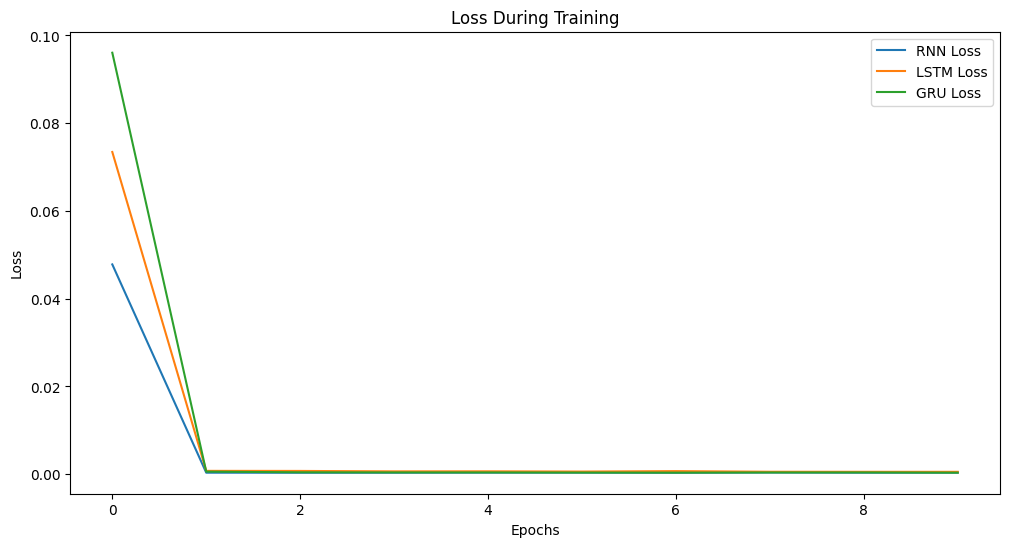

22/22 [==============================] - 0s 3ms/step


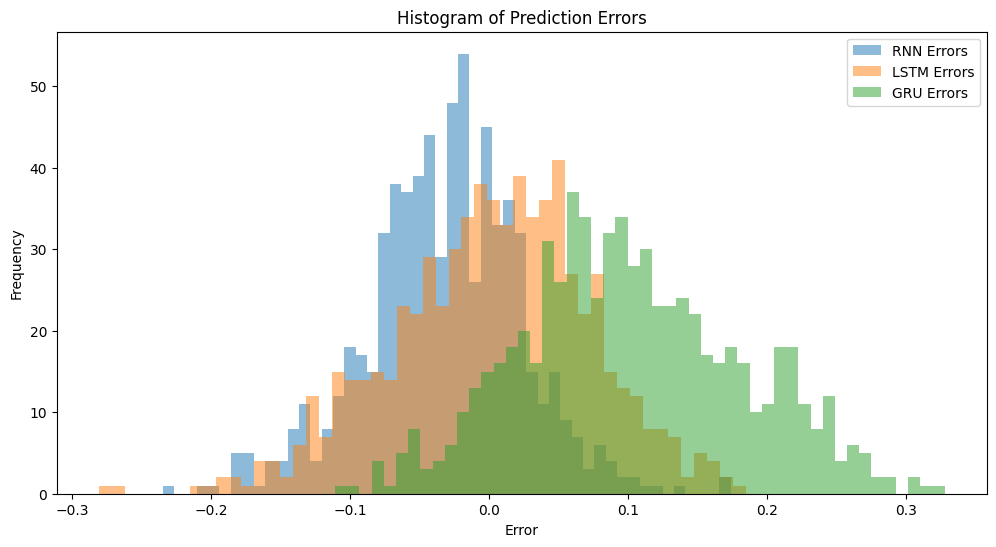

22/22 [==============================] - 0s 3ms/step


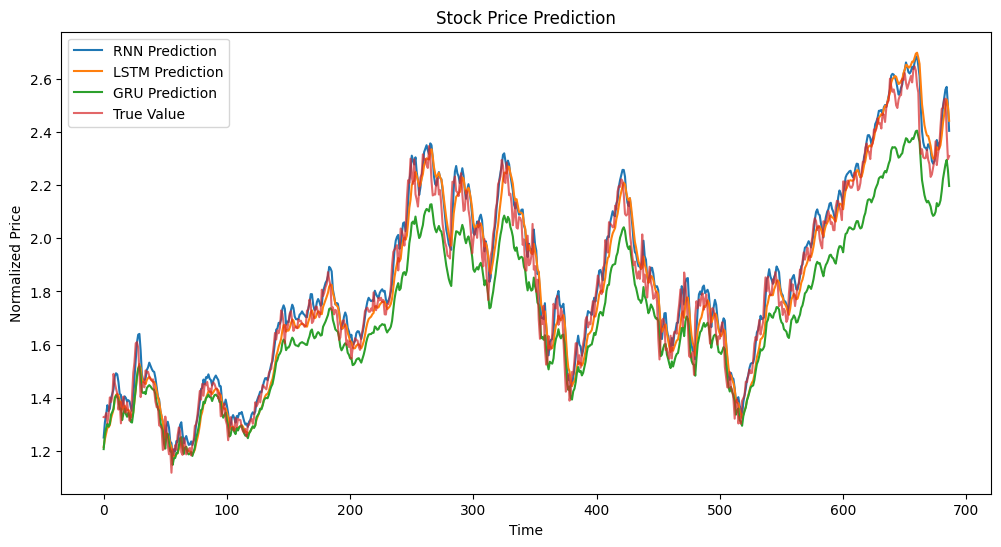

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import check_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Función para descargar datos
def fetch_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close']

# Función para normalizar datos
def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

# Función para crear secuencias de datos
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Función para dividir datos en conjuntos de entrenamiento y prueba
def split_data(X, y, train_split):
    train_size = int(train_split * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

# Función para crear y compilar modelos
def build_model(model_type, seq_length, num_units):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(num_units, activation='relu', input_shape=(seq_length, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(num_units, activation='relu', input_shape=(seq_length, 1)))
    elif model_type == 'GRU':
        model.add(GRU(num_units, activation='relu', input_shape=(seq_length, 1)))
    else:
        raise ValueError("Model type must be 'RNN', 'LSTM', or 'GRU'")
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, num_epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)
    predictions = model.predict(X_test)
    loss = model.evaluate(X_test, y_test, verbose=0)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    return history.history['loss'], loss, mae, rmse, r2, mape

# Función para graficar pérdidas durante el entrenamiento
def plot_training_loss(losses, model_names):
    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(model_names):
        plt.plot(losses[i], label=f'{model_name} Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Función para graficar histograma de errores de predicción
def plot_error_histogram(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(model_names):
        errors = y_test - models[i].predict(X_test).flatten()
        plt.hist(errors, bins=50, alpha=0.5, label=f'{model_name} Errors')
    plt.title('Histogram of Prediction Errors')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Función para graficar resultados
def plot_results(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 6))
    for i, model in enumerate(models):
        predictions = model.predict(X_test)
        plt.plot(predictions, label=f'{model_names[i]} Prediction')
    plt.plot(y_test, label='True Value', alpha=0.7)
    plt.legend()
    plt.title(f'Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.show()

# Parámetros configurables
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-10'
seq_length = 10
num_units = 50
num_epochs = 10
batch_size = 32

# Descargar y normalizar datos
closing_prices = fetch_data(ticker_symbol, start_date, end_date)
normalized_prices = normalize_data(closing_prices)

# Crear secuencias y dividir datos
X, y = create_sequences(normalized_prices, seq_length)
X_train, X_test, y_train, y_test = split_data(X, y, 0.8)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Crear modelos
model_types = ['RNN', 'LSTM', 'GRU']
models = [build_model(model_type, seq_length, num_units) for model_type in model_types]

# Entrenar y evaluar modelos
losses = []
test_losses = []
mae_values = []
rmse_values = []
r2_values = []
mape_values = []

for i, model in enumerate(models):
    loss, test_loss, mae, rmse, r2, mape = train_and_evaluate_model(model, X_train, y_train, X_test, y_test, num_epochs, batch_size)
    losses.append(loss)
    test_losses.append(test_loss)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    mape_values.append(mape)

    # Imprimir métricas
    print(f'{model_types[i]} Metrics:')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R^2: {r2:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'Test Loss: {test_loss:.4f}')
    print('-' * 40)

# Visualizar pérdidas durante el entrenamiento
plot_training_loss(losses, model_types)

# Visualizar histograma de errores de predicción
plot_error_histogram(models, model_types, X_test, y_test)

# Visualizar resultados
plot_results(models, model_types, X_test, y_test)

In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=39be2e4c46efdc66703d558c8ccac3169830d179241ef8500f3a1d440f03e27a
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkzfg558l
  JVM stdout: /tmp/tmpkzfg558l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkzfg558l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_gk8fff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[*********************100%%**********************]  1 of 1 completed
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
03:33:35.932: Project: AutoML_1_20231003_33335
03:33:35.933: Setting stopping tolerance adaptively based on the training frame: 0.019121472563060887
03:33:35.933: Build control seed: 1
03:33:35.934: training frame: Frame key: AutoML_1_20231003_33335_training_py_2_sid_b39e    cols: 2    rows: 2735  chunks: 1    size: 43896  checksum: -4786256473293334624
03:33:35.935: validation frame: NULL
03:33:35.935: leaderboard frame: NULL
03:33:35.945: blending frame: NULL
03:33:35.946: response column: Adj Close
03:33:35.946: fold column: null
03:33:35.946: weights column: null
03:33:36.33: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 

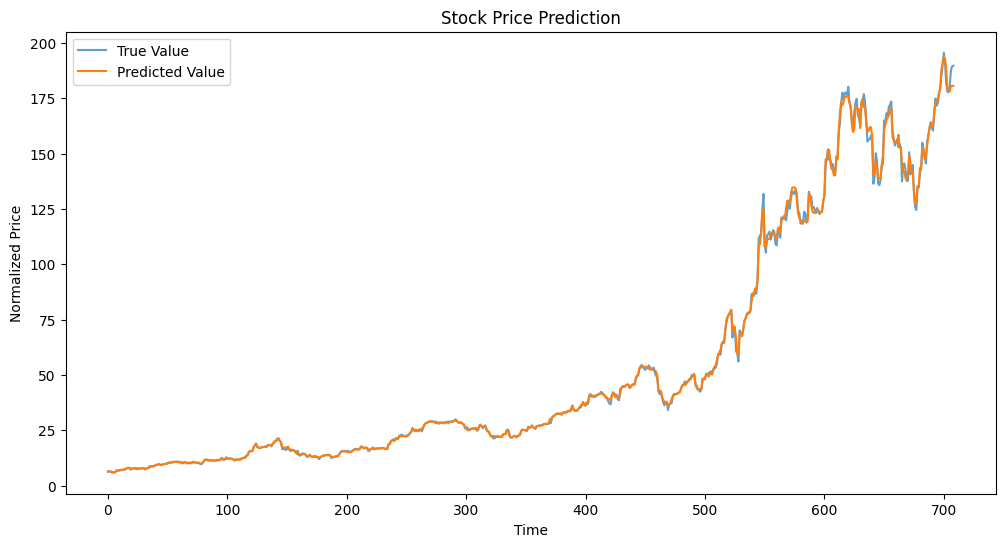

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar H2O
h2o.init()

# Función para descargar datos
def fetch_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close']

# Parámetros configurables
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-10'

# Descargar datos y crear DataFrame
closing_prices = fetch_data(ticker_symbol, start_date, end_date)
closing_prices = pd.DataFrame({'Date': closing_prices.index, 'Adj Close': closing_prices.values})

# Inicializar un objeto H2OFrame
h2o_df = h2o.H2OFrame(closing_prices)

# Configurar columnas predictoras y objetivo
x = ["Date"]
y = "Adj Close"

# Dividir los datos en entrenamiento y prueba (80% - 20%)
train, test = h2o_df.split_frame(ratios=[0.8])

# Configurar AutoML
aml = H2OAutoML(max_models=10, seed=1, verbosity="info", nfolds=5, max_runtime_secs=3600)

# Entrenar modelos con AutoML
aml.train(x=x, y=y, training_frame=train)

# Obtener el mejor modelo según AutoML
best_model = aml.leader

# Realizar predicciones en el conjunto de prueba
predictions = best_model.predict(test)
predictions = predictions.as_data_frame()

# Calcular métricas
y_test = test[y].as_data_frame()
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# Imprimir métricas
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2: {r2:.4f}')

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test['Adj Close'], label='True Value', alpha=0.7)
plt.plot(predictions['predict'], label='Predicted Value')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.show()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,36 mins 15 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_gk8fff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.897 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[*********************100%%**********************]  1 of 1 completed
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:09:46.869: Project: AutoML_12_20231003_40946
04:09:46.869: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:09:46.869: Setting stopping tolerance adaptively based on the training frame: 0.0203362958695521
04:09:46.869: Build control seed: 1
04:09:46.869: training frame: Frame key: AutoML_12_20231003_40946_training_py_94_sid_a180    cols: 5    rows: 2418  chunks: 1    size: 46298  checksum: -1314904638410031171
04:09:46.869: validation frame: Frame key: py_95_sid_a180    cols: 5    rows: 512  chunks: 1    size: 10084  checksum: -3088638381897404596
04:09:46.869: leaderboard frame: NULL
04:09:46.8

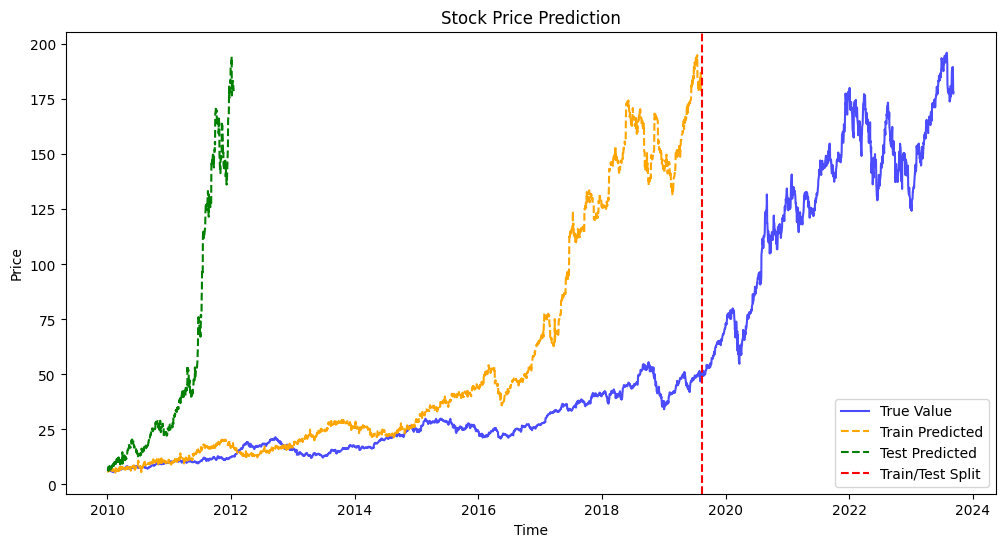

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar H2O
h2o.init()

# Función para descargar datos
def fetch_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close']

# Parámetros configurables
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-10'

# Descargar datos y crear DataFrame
closing_prices = fetch_data(ticker_symbol, start_date, end_date)
closing_prices = pd.DataFrame({'Date': closing_prices.index, 'Adj Close': closing_prices.values})

# Crear nuevas características: Año, Mes y Día
closing_prices['Year'] = closing_prices['Date'].dt.year
closing_prices['Month'] = closing_prices['Date'].dt.month
closing_prices['Day'] = closing_prices['Date'].dt.day

# Convertir a H2OFrame
h2o_df = h2o.H2OFrame(closing_prices)

# Configurar columnas predictoras y objetivo
x = ["Year", "Month", "Day"]
y = "Adj Close"

# División de datos. Asegúrate de que esta división tenga sentido para tu caso de uso
train, valid, test = h2o_df.split_frame(ratios=[0.7, 0.15], seed=1)

# Configurar AutoML
aml = H2OAutoML(max_models=10, seed=1, verbosity="info", nfolds=5, max_runtime_secs=3600)

# Entrenar modelos con AutoML
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# Obtener el mejor modelo
best_model = aml.leader

# Realizar predicciones
train_predictions = best_model.predict(train).as_data_frame()
test_predictions = best_model.predict(test).as_data_frame()

# Calcular métricas
y_train = train[y].as_data_frame()
y_test = test[y].as_data_frame()

mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)

rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

# Evitar division por cero en MAPE
y_train_mape = y_train.copy()
y_train_mape[y_train_mape == 0] = np.nan

y_test_mape = y_test.copy()
y_test_mape[y_test_mape == 0] = np.nan

# Calcular MAPE
mape_train = np.mean(np.abs((y_train.values - train_predictions.values) / y_train.values)) * 100
mape_test = np.mean(np.abs((y_test.values - test_predictions.values) / y_test.values)) * 100


# Imprimir métricas
print("Train Metrics:")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R^2: {r2_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print("-" * 40)
print("Test Metrics:")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R^2: {r2_test:.4f}")
print(f"MAPE: {mape_test:.4f}")

# Visualización
plt.figure(figsize=(12, 6))

# Graficar los valores verdaderos
plt.plot(closing_prices['Date'], closing_prices['Adj Close'], label="True Value", alpha=0.7, color="blue")

# Convertir el H2OFrame a un DataFrame para poder manipular más fácil los índices
train_as_df = train.as_data_frame()
test_as_df = test.as_data_frame()

# Graficar las predicciones de entrenamiento y prueba utilizando diferentes colores
plt.plot(closing_prices.iloc[train_as_df.index]['Date'], train_predictions['predict'], label="Train Predicted", linestyle="--", color="orange")
plt.plot(closing_prices.iloc[test_as_df.index]['Date'], test_predictions['predict'], label="Test Predicted", linestyle="--", color="green")

# Personalización del gráfico
plt.axvline(closing_prices.iloc[train_as_df.index[-1]]['Date'], color='red', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inicializar H2O
h2o.init()

# Función para descargar datos
def fetch_data(ticker_symbol, start_date, end_date):
    return yf.download(ticker_symbol, start=start_date, end=end_date)['Adj Close']

# Parámetros configurables
ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-09-10'

# Descargar datos y crear DataFrame
closing_prices = fetch_data(ticker_symbol, start_date, end_date)
closing_prices = pd.DataFrame({'Date': closing_prices.index, 'Adj Close': closing_prices.values})

# Crear nuevas características: Año, Mes y Día
closing_prices['Year'] = closing_prices['Date'].dt.year
closing_prices['Month'] = closing_prices['Date'].dt.month
closing_prices['Day'] = closing_prices['Date'].dt.day

# Convertir a H2OFrame
h2o_df = h2o.H2OFrame(closing_prices)

# Configurar columnas predictoras y objetivo
x = ["Year", "Month", "Day"]
y = "Adj Close"

# División de datos basada en fecha
split_date = "2022-01-01"
train = h2o_df[h2o_df["Date"] < split_date]
test = h2o_df[h2o_df["Date"] >= split_date]

# Configurar AutoML
aml = H2OAutoML(max_models=10, seed=1, verbosity="info", nfolds=5, max_runtime_secs=3600)

# Entrenar modelos con AutoML
aml.train(x=x, y=y, training_frame=train)

# Obtener el mejor modelo
best_model = aml.leader

# ...
# Realizar predicciones
train_predictions = best_model.predict(train).as_data_frame()
test_predictions = best_model.predict(test).as_data_frame()

# Verificar que los conjuntos de datos para el cálculo de métricas no estén vacíos
if y_test.shape[0] == 0 or test_predictions.shape[0] == 0:
    raise ValueError("y_test or test_predictions is empty!")

# Calcular métricas
y_train = train[y].as_data_frame()
y_test = test[y].as_data_frame()

mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
# ...



rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

mape_train = np.mean(np.abs((y_train.values - train_predictions.values) / y_train.values)) * 100
mape_test = np.mean(np.abs((y_test.values - test_predictions.values) / y_test.values)) * 100

# Imprimir métricas
print("Train Metrics:")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R^2: {r2_train:.4f}")
print(f"MAPE: {mape_train:.4f}")
print("-" * 40)
print("Test Metrics:")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R^2: {r2_test:.4f}")
print(f"MAPE: {mape_test:.4f}")

# Agregar fecha a las predicciones y convertir 'Date' a datetime
train_predictions = train.as_data_frame(use_pandas=True)[['Date']].merge(train_predictions, left_index=True, right_index=True)
test_predictions = test.as_data_frame(use_pandas=True)[['Date']].merge(test_predictions, left_index=True, right_index=True)
train_predictions['Date'] = pd.to_datetime(train_predictions['Date'])
test_predictions['Date'] = pd.to_datetime(test_predictions['Date'])

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(closing_prices['Date'], closing_prices['Adj Close'], label="True Value", alpha=0.7, color="blue")
plt.plot(train_predictions['Date'], train_predictions['predict'], label="Train Predicted", linestyle="--", color="orange")
plt.plot(test_predictions['Date'], test_predictions['predict'], label="Test Predicted", linestyle="--", color="green")

# Personalización del gráfico
plt.axvline(pd.to_datetime(split_date), color='red', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 11 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_gk8fff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.709 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[*********************100%%**********************]  1 of 1 completed
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:44:34.582: Project: AutoML_26_20231003_44434
04:44:34.593: Setting stopping tolerance adaptively based on the training frame: 0.017039954414774926
04:44:34.593: Build control seed: 1
04:44:34.593: training frame: Frame key: AutoML_26_20231003_44434_training_py_217_sid_ba53    cols: 5    rows: 3444  chunks: 1    size: 65792  checksum: 1261215739045579077
04:44:34.594: validation frame: NULL
04:44:34.594: leaderboard frame: NULL
04:44:34.594: blending frame: NULL
04:44:34.594: response column: Adj Close
04:44:34.594: fold column: null
04:44:34.594: weights column: null
04:44:34.594: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), de

ValueError: ignored

In [ ]:
test_predictions = best_model.predict(test)
print(test_predictions.shape)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
(0, 1)


In [ ]:
print(test.shape)


(0, 5)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_gk8fff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.645 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[*********************100%%**********************]  1 of 1 completed
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R^2 Train: 1.00, Test: 1.00
RMSE Train: 1.30, Test: 1.54
MAPE Train: 1.26%, Test: 1.35%
MSE Train: 1.69, Test: 2.37


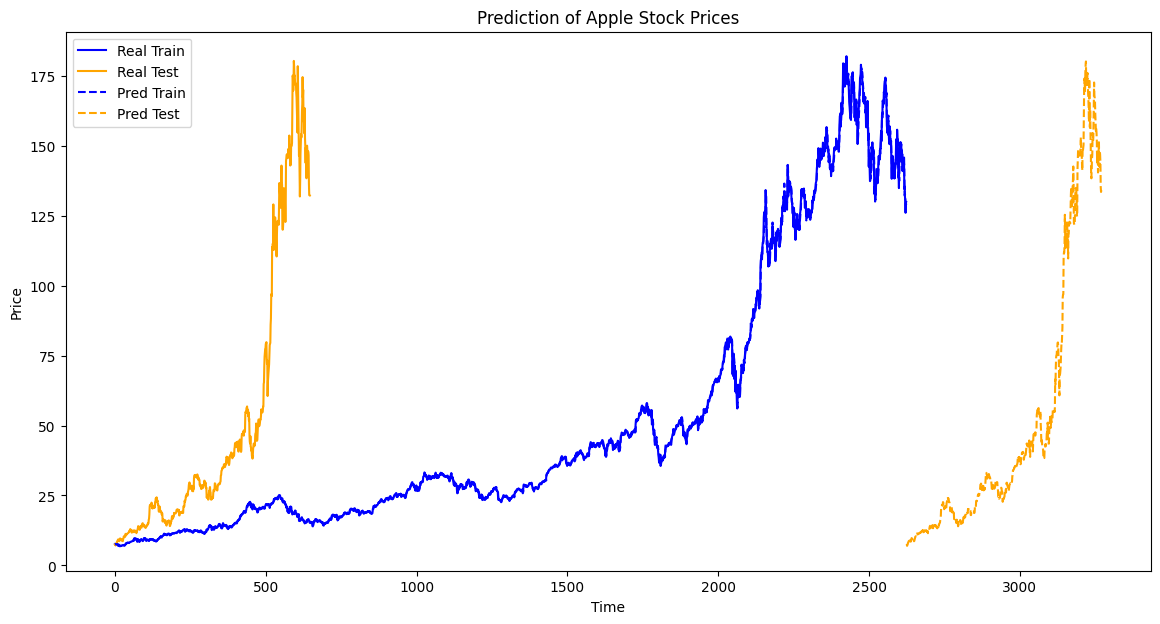

H2O session _sid_b6fb closed.


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar H2O
h2o.init()

# Descargar datos de Apple usando yfinance
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
data['Date'] = data.index

# Preprocesamiento: crear un desfase en los precios para predecir el precio del día siguiente
data['Price_Shifted'] = data['Close'].shift(-1)
data = data.dropna()

# Convertir el DataFrame de pandas a un H2OFrame
h2o_data = h2o.H2OFrame(data)

# Definir columnas de entrada y salida
input_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
output_col = 'Price_Shifted'

# Dividir datos en conjuntos de entrenamiento y prueba
train, test = h2o_data.split_frame(ratios=[0.8], seed=1)

# Ejecutar AutoML
aml = H2OAutoML(max_models=10, max_runtime_secs=300, seed=1)
aml.train(x=input_cols, y=output_col, training_frame=train)

# Predecir con el modelo líder
pred_train = aml.predict(train)
pred_test = aml.predict(test)

# Convertir a numpy para cálculos y gráficos
train_np = train.as_data_frame().to_numpy()
test_np = test.as_data_frame().to_numpy()
pred_train_np = pred_train.as_data_frame().to_numpy()
pred_test_np = pred_test.as_data_frame().to_numpy()

# Calcular métricas
r2_train = r2_score(train_np[:,-1], pred_train_np)
r2_test = r2_score(test_np[:,-1], pred_test_np)
rmse_train = np.sqrt(mean_squared_error(train_np[:,-1], pred_train_np))
rmse_test = np.sqrt(mean_squared_error(test_np[:,-1], pred_test_np))
mape_train = np.mean(np.abs((train_np[:,-1] - pred_train_np.reshape(-1)) / train_np[:,-1])) * 100
mape_test = np.mean(np.abs((test_np[:,-1] - pred_test_np.reshape(-1)) / test_np[:,-1])) * 100
mse_train = mean_squared_error(train_np[:,-1], pred_train_np)
mse_test = mean_squared_error(test_np[:,-1], pred_test_np)

# Imprimir métricas
print(f"R^2 Train: {r2_train:.2f}, Test: {r2_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}, Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.2f}%, Test: {mape_test:.2f}%")
print(f"MSE Train: {mse_train:.2f}, Test: {mse_test:.2f}")

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(train_np[:,-1], label='Real Train', color='blue')
plt.plot(test_np[:,-1], label='Real Test', color='orange')
plt.plot(pred_train_np, label='Pred Train', color='blue', linestyle='dashed')
plt.plot(np.arange(len(train_np), len(train_np) + len(test_np)), pred_test_np, label='Pred Test', color='orange', linestyle='dashed')
plt.legend()
plt.title('Prediction of Apple Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Finalizar H2O
h2o.cluster().shutdown()



[*********************100%%**********************]  1 of 1 completed
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 28 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_asuit0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.164 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
R2 Train: 0.9997656523596417
R2 Test: 0.9978852582249643
RMSE Train: 0.46611025287389246
RMSE Test: 1.4220633804105052
MAPE Train: 0.27533400639980815
MAPE Test: 0.867678916779545
MSE Train: 0.21725876783416395
MSE Test: 2.022264257904553


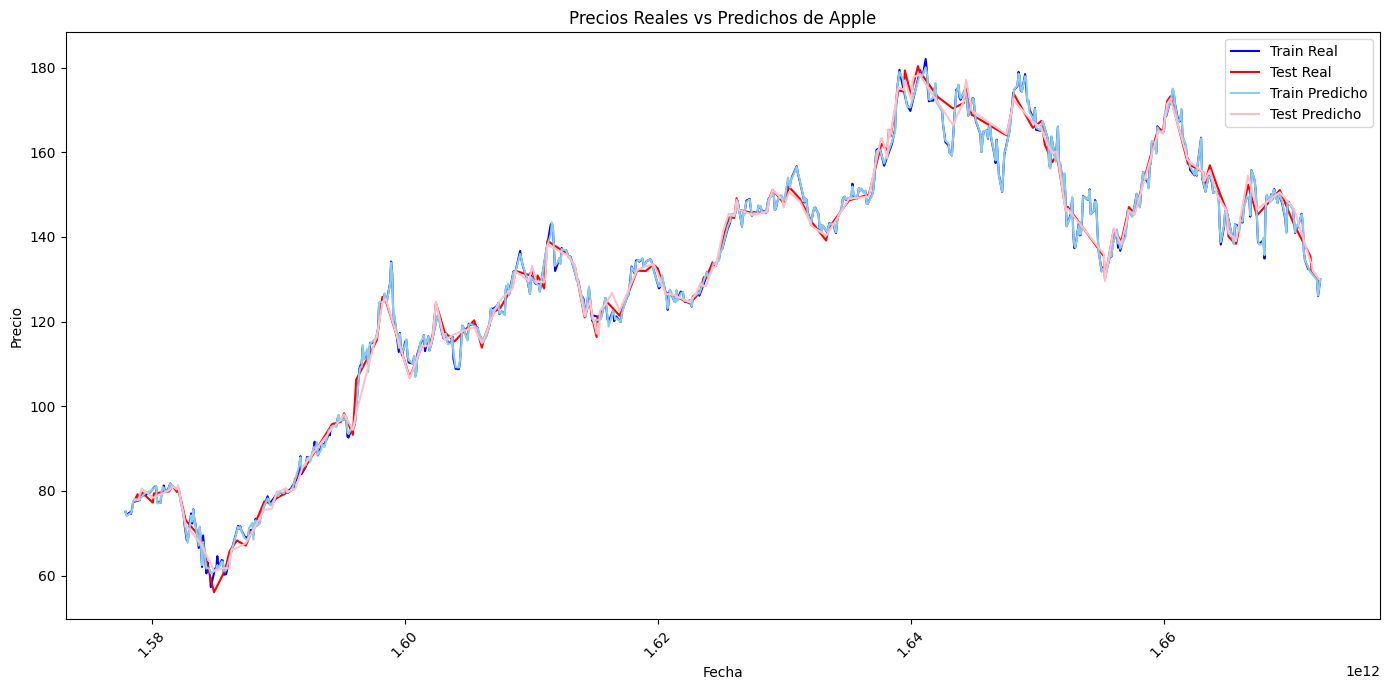

H2O session _sid_b6cf closed.


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Descargar los datos
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Resetear el índice para que la Fecha sea una columna
data = data.reset_index()

# Extraer características de la fecha
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

# Iniciar H2O
h2o.init()

# Convertir el DataFrame de pandas a un Frame de H2O
h2o_data = h2o.H2OFrame(data)

# Dividir los datos
train, test = h2o_data.split_frame([0.8])

# Definir x e y
x = train.columns
y = "Close"
x.remove(y)

# Iniciar AutoML
aml = H2OAutoML(max_models=1, max_runtime_secs=600, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Predicciones
pred_train = aml.predict(train).as_data_frame().values.flatten()
pred_test = aml.predict(test).as_data_frame().values.flatten()

# Convertir train y test a pandas DataFrame
train_df = train.as_data_frame()
test_df = test.as_data_frame()

# Métricas
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"R2 Train: {r2_score(train_df[y], pred_train)}")
print(f"R2 Test: {r2_score(test_df[y], pred_test)}")
print(f"RMSE Train: {np.sqrt(mean_squared_error(train_df[y], pred_train))}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(test_df[y], pred_test))}")
print(f"MAPE Train: {mean_absolute_percentage_error(train_df[y], pred_train)}")
print(f"MAPE Test: {mean_absolute_percentage_error(test_df[y], pred_test)}")
print(f"MSE Train: {mean_squared_error(train_df[y], pred_train)}")
print(f"MSE Test: {mean_squared_error(test_df[y], pred_test)}")

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'], train_df[y], label='Train Real', color='blue')
plt.plot(test_df['Date'], test_df[y], label='Test Real', color='red')
plt.plot(train_df['Date'], pred_train, label='Train Predicho', color='skyblue')
plt.plot(test_df['Date'], pred_test, label='Test Predicho', color='pink')
plt.legend()
plt.title('Precios Reales vs Predichos de Apple')
plt.ylabel('Precio')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Finalizar H2O
h2o.cluster().shutdown()

[*********************100%%**********************]  1 of 1 completed
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa17jwhlq
  JVM stdout: /tmp/tmpa17jwhlq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpa17jwhlq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_ywk9e3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                             rmse      mse      mae       rmsle    mean_residual_deviance
XGBoost_1_AutoML_1_20231003_51034  1.5305  2.34242  1.14757  0.00977959                   2.34242
[1 row x 6 columns]

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
R2 Train: 0.9978539858767359
RMSE Train: 0.5772497215879195
MAE Train: 0.37688691152167


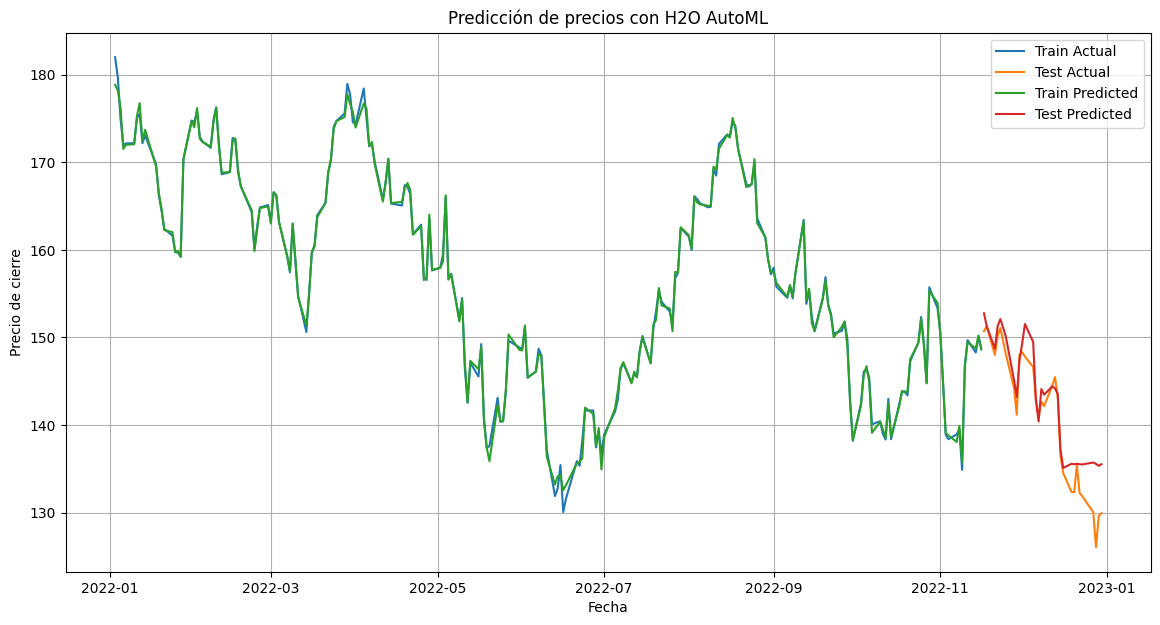

H2O session _sid_b8ee closed.


<ipython-input-38-68dccebe8a71>:73: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


In [ ]:
import yfinance as yf
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Función para verificar fechas
def verificar_fechas(df):
    # Tu lógica aquí para verificar la validez de las fechas
    pass

# Cargar datos
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
verificar_fechas(data)

# Preparar datos
data['Date'] = data.index
data.reset_index(drop=True, inplace=True)

# Asegúrate de que las fechas están en el formato correcto y posiblemente crea nuevas características relacionadas con la fecha si lo necesitas
# ...

# Dividir los datos
train = data[:-30]
test = data[-30:]

# Iniciar h2o
h2o.init()

# Convertir los datos de train/test a frames de H2O
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

# Identificar predictores y respuesta
x = train_hex.columns
y = "Close"  # Variable que queremos predecir
x.remove(y)

# Ejecutar AutoML
aml = H2OAutoML(max_models=1, seed=1)
aml.train(x=x, y=y, training_frame=train_hex)

# Ver el líder del AutoML
lb = aml.leaderboard
print(lb)

# Predicciones
pred_train = aml.predict(train_hex).as_data_frame().values.flatten()
pred_test = aml.predict(test_hex).as_data_frame().values.flatten()

# Cálculo de métricas
print("R2 Train:", r2_score(train[y], pred_train))
print("RMSE Train:", np.sqrt(mean_squared_error(train[y], pred_train)))
print("MAE Train:", mean_absolute_error(train[y], pred_train))
#... y lo mismo para test

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(train['Date'], train[y], label='Train Actual')
plt.plot(test['Date'], test[y], label='Test Actual')
plt.plot(train['Date'], pred_train, label='Train Predicted')
plt.plot(test['Date'], pred_test, label='Test Predicted')
plt.legend()
plt.title('Predicción de precios con H2O AutoML')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.grid(True)
plt.show()

# Finalizar la instancia de h2o
h2o.shutdown(prompt=False)
